# 1. Import librally

In [1]:
import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim
import folium

import json
import requests
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt

from sklearn import linear_model

import matplotlib.pyplot as plt

import time

# 2. Download birth rate data

In [2]:
# Download japan birth rate data which discribe each borough
url = 'https://www.e-stat.go.jp/stat-search/file-download?statInfId=000031881307&fileKind=1'
# This data is discribed by japanese. So  we should encode cp932
df_birth = pd.read_csv(url,encoding='cp932')
df_birth.head(10)

,平成30年,人口動態統計,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,上巻 出生 第４．４表 都道府県別にみた年次別出生率（人口千対）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,注：１）昭和10・22年は事件発生地により、昭和25年は母の住所地により、昭和30年以降は子...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,２）昭和25年の全国には、不詳を含む。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1935.0,1947,1950,1955,1960,1965,1970,1975.0,1980.0,...,1990.0,1995.0,2000.0,2005.0,2010.0,2014.0,2015.0,2016.0,2017.0,2018.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,全 国,31.6,34.3,28.1,19.4,17.2,18.6,18.8,17.1,13.6,...,10.0,9.6,9.5,8.4,8.5,8.0,8.0,7.8,7.6,7.4
7,０１北海道,35.8,36.7,34.2,21.7,18.6,18.7,17.7,16.8,13.6,...,9.7,8.8,8.2,7.4,7.3,6.9,6.8,6.6,6.4,6.2
8,０２青 森,42.4,41.5,36,25.5,20.9,19.9,18.5,16.4,14.3,...,9.9,9.5,8.8,7.3,7.1,6.7,6.6,6.7,6.3,6.2
9,０３岩 手,38.6,36.5,33.9,24.3,19.2,17.5,16.1,16.0,13.8,...,10.1,9.2,8.8,7.6,7.4,6.9,6.9,6.6,6.5,6.2


### Clean the birth rate data

In [3]:
# drop row data which explanate data
df_birth = df_birth.dropna()
df_birth = df_birth.drop(df_birth.index[[0]])
df_birth.head()

,平成30年,人口動態統計,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
7,０１北海道,35.8,36.7,34.2,21.7,18.6,18.7,17.7,16.8,13.6,...,9.7,8.8,8.2,7.4,7.3,6.9,6.8,6.6,6.4,6.2
8,０２青 森,42.4,41.5,36,25.5,20.9,19.9,18.5,16.4,14.3,...,9.9,9.5,8.8,7.3,7.1,6.7,6.6,6.7,6.3,6.2
9,０３岩 手,38.6,36.5,33.9,24.3,19.2,17.5,16.1,16.0,13.8,...,10.1,9.2,8.8,7.6,7.4,6.9,6.9,6.6,6.5,6.2
10,０４宮 城,36.5,35.4,32,22.3,18,16.7,16.8,16.8,15.0,...,10.4,9.6,9.4,8.2,8.2,7.8,7.8,7.5,7.2,7.1
11,０５秋 田,40.2,38,32.6,22.5,17.6,15.5,14.3,14.2,13.0,...,9.0,8.2,7.6,6.7,6.2,5.8,5.7,5.6,5.4,5.2


In [4]:
# unnamed 20 column is 2018 data and this data is newest data. so we use this column
df_birth = df_birth.loc[:,['平成30年','Unnamed: 20']]

In [5]:
# change the column name from japanese to english
# And select Prefecture's main city
df = df_birth.rename(columns={'平成30年':'Prefectures','Unnamed: 20':'Birth rate'})
df.insert(0,'Prefectural capitals','')
df.iat[0,0] = 'sapporo'
df.iat[1,0] = 'aomori'
df.iat[2,0] = 'morioka'
df.iat[3,0] = 'sendai'
df.iat[4,0] = 'akita'
df.iat[5,0] = 'yamagata'
df.iat[6,0] = 'fukushima'
df.iat[7,0] = 'mito'
df.iat[8,0] = 'utsunomiya'
df.iat[9,0] = 'maebashi'
df.iat[10,0] = 'saitama'
df.iat[11,0] = 'chiba'
df.iat[12,0] = 'shinjuku'
df.iat[13,0] = 'yokohama'
df.iat[14,0] = 'niigata'
df.iat[15,0] = 'toyama'
df.iat[16,0] = 'kanazawa'
df.iat[17,0] = 'fukui'
df.iat[18,0] = 'kofu'
df.iat[19,0] = 'nagano'
df.iat[20,0] = 'gifu'
df.iat[21,0] = 'shizuoka'
df.iat[22,0] = 'nagoya'
df.iat[23,0] = 'tsu'
df.iat[24,0] = 'ohtsu'
df.iat[25,0] = 'kyoto'
df.iat[26,0] = 'osaka'
df.iat[27,0] = 'kobe'
df.iat[28,0] = 'nara'
df.iat[29,0] = 'wakayama'
df.iat[30,0] = 'tottori'
df.iat[31,0] = 'matsue'
df.iat[32,0] = 'okayama'
df.iat[33,0] = 'hiroshima'
df.iat[34,0] = 'yamaguchi'
df.iat[35,0] = 'tokushima'
df.iat[36,0] = 'takamatsu'
df.iat[37,0] = 'matsuyama'
df.iat[38,0] = 'kochi'
df.iat[39,0] = 'fukuoka'
df.iat[40,0] = 'saga'
df.iat[41,0] = 'nagasaki'
df.iat[42,0] = 'kumamoto'
df.iat[43,0] = 'oita'
df.iat[44,0] = 'miyazaki'
df.iat[45,0] = 'kagoshima'
df.iat[46,0] = 'naha'

# translate japanese to english
df.iat[0,1] = 'hokkaido'
df.iat[1,1] = 'aomori'
df.iat[2,1] = 'iwate'
df.iat[3,1] = 'miyagi'
df.iat[4,1] = 'akita'
df.iat[5,1] = 'yamagata'
df.iat[6,1] = 'fukushima'
df.iat[7,1] = 'ibaraki'
df.iat[8,1] = 'tochigi'
df.iat[9,1] = 'gunma'
df.iat[10,1] = 'saitama'
df.iat[11,1] = 'chiba'
df.iat[12,1] = 'tokyo'
df.iat[13,1] = 'kanagawa'
df.iat[14,1] = 'niigata'
df.iat[15,1] = 'toyama'
df.iat[16,1] = 'ishikawa'
df.iat[17,1] = 'fukui'
df.iat[18,1] = 'yamanashi'
df.iat[19,1] = 'nagano'
df.iat[20,1] = 'gifu'
df.iat[21,1] = 'shizuoka'
df.iat[22,1] = 'aichi'
df.iat[23,1] = 'mie'
df.iat[24,1] = 'shiga'
df.iat[25,1] = 'kyoto'
df.iat[26,1] = 'osaka'
df.iat[27,1] = 'hyogo'
df.iat[28,1] = 'nara'
df.iat[29,1] = 'wakayama'
df.iat[30,1] = 'tottori'
df.iat[31,1] = 'shimane'
df.iat[32,1] = 'okayama'
df.iat[33,1] = 'hiroshima'
df.iat[34,1] = 'yamaguchi'
df.iat[35,1] = 'tokushima'
df.iat[36,1] = 'kagawa'
df.iat[37,1] = 'ehime'
df.iat[38,1] = 'kochi'
df.iat[39,1] = 'fukuoka'
df.iat[40,1] = 'saga'
df.iat[41,1] = 'nagasaki'
df.iat[42,1] = 'kumamoto'
df.iat[43,1] = 'oita'
df.iat[44,1] = 'miyazaki'
df.iat[45,1] = 'kagoshima'
df.iat[46,1] = 'okinawa'
df = df.reset_index(drop=True)
#df = df.set_index('Prefectures')
print(df)

   Prefectural capitals Prefectures  Birth rate
0               sapporo    hokkaido         6.2
1                aomori      aomori         6.2
2               morioka       iwate         6.2
3                sendai      miyagi         7.1
4                 akita       akita         5.2
5              yamagata    yamagata         6.4
6             fukushima   fukushima         6.8
7                  mito     ibaraki         6.8
8            utsunomiya     tochigi         7.0
9              maebashi       gunma         6.8
10              saitama     saitama         7.1
11                chiba       chiba         7.1
12             shinjuku       tokyo         8.0
13             yokohama    kanagawa         7.4
14              niigata     niigata         6.5
15               toyama      toyama         6.6
16             kanazawa    ishikawa         7.4
17                fukui       fukui         7.6
18                 kofu   yamanashi         6.9
19               nagano      nagano     

In [6]:
print(df.shape)
df.head()

(47, 3)


,Prefectural capitals,Prefectures,Birth rate
0,sapporo,hokkaido,6.2
1,aomori,aomori,6.2
2,morioka,iwate,6.2
3,sendai,miyagi,7.1
4,akita,akita,5.2


### Adding latitude and longitude data for each prefectures

In [7]:
geolocator=Nominatim(timeout=4)
df['latitude'] = 0.000
df['longitude'] = 0.000
for i,address in enumerate(df['Prefectural capitals']):
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    print('{} is {}, {}'.format(address,latitude,longitude))
    df.at[i,'latitude'] = latitude
    df.at[i,'longitude'] = longitude

df.head()

C:\Users\kazuya\.conda\envs\ds\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


sapporo is 43.061936, 141.3542924
aomori is 40.886943, 140.590121
morioka is 39.7021331, 141.1545397
sendai is 38.2677554, 140.8691498
akita is 39.6898802, 140.342608
yamagata is 38.2553393, 140.3400205
fukushima is 37.75454, 140.4592144
mito is 36.3657792, 140.4713933
utsunomiya is 36.5549677, 139.8828776
maebashi is 36.3893418, 139.0632826
saitama is 35.8616402, 139.6457957
chiba is 35.609985, 140.118126
shinjuku is 35.6937632, 139.7036319
yokohama is 35.444991, 139.636768
niigata is 37.6452283, 138.7669125
toyama is 36.6957569, 137.2136215
kanazawa is 36.5780499, 136.6480247
fukui is 35.9263502, 136.6068127
kofu is 35.6652481, 138.5710441
nagano is 36.1143945, 138.0319015
gifu is 35.7867449, 137.0460777
shizuoka is 34.9332488, 138.0955398
nagoya is 35.1851045, 136.8998438
tsu is 34.7341973, 136.5153283
ohtsu is 19.4733135, -70.693088
kyoto is 35.021041, 135.7556075
osaka is 34.6198813, 135.490357
kobe is 34.6932379, 135.1943764
nara is 34.2963089, 135.8816819
wakayama is 34.234617, 

,Prefectural capitals,Prefectures,Birth rate,latitude,longitude
0,sapporo,hokkaido,6.2,43.061936,141.354292
1,aomori,aomori,6.2,40.886943,140.590121
2,morioka,iwate,6.2,39.702133,141.154540
3,sendai,miyagi,7.1,38.267755,140.869150
4,akita,akita,5.2,39.689880,140.342608


In [8]:
# Calculate max Birth rate and minimum Birth rate
print(df.shape)
max_birth = max(df['Birth rate'])
min_birth = min(df['Birth rate'])

(47, 5)


### Check the location
Circle radius discribe Birth rate

In [9]:
location = [df.at[12,'latitude'],df.at[12,'longitude']]
map_jp = folium.Map(location,zoom_start = 5)

# add markers to map
for lat, lng, pref, Brate in zip(df['latitude'],df['longitude'],df['Prefectures'], df['Birth rate']):
    label = '{} {} {}'.format(pref, lat, lng)
    label = folium.Popup(label,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius = (Brate - min_birth)/(max_birth - min_birth)*10 + 1,
    color = 'blue',
    popup = label,
    fill = True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html = False
    ).add_to(map_jp)
map_jp

# 3. Get a restaulant data for each Prefectures

### Define Foursquare Credentials and version

In [10]:
CLIENT_ID = 'YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU' # your Foursquare ID
CLIENT_SECRET = 'B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [19]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [20]:
venues = results['response']['groups'][0]['items']

nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:,filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

NameError: name 'results' is not defined

In [208]:
nearby_venues.shape

(30, 4)

## Create NearbyVenue DataFrame

In [348]:
def getNearbyVenues(names, latitudes, longitudes):
    LIMIT =50
    radius = 100000
    venues_list = []
    for name, lat, lng in zip(names,latitudes, longitudes):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&LI'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        'Food',
        radius,
        LIMIT)
        print(url)        
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        venues_list.append([(
        name,
        lat,
        lng,
        v['venue']['name'],
        v['venue']['categories'][0]['name'])for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Prefecture',
                           'Prefectures latitude',
                           'Prefectures longitude',
                            'venue',
                            'venue category']
    
    return(nearby_venues)

### I can use forsquare only 5000 in 1 hour. so, I use it one by one

In [351]:
df1 = df.iloc[:9,:]
df2 = df.iloc[:18,:]
df3 = df.iloc[:27,:]
df4 = df.iloc[:36,:]
df5 = df.iloc[:45,:]
df6 = df.iloc[45:,:]

In [352]:
venues1 = getNearbyVenues(names = df1['Prefectures'],
                        latitudes = df1['latitude'],
                        longitudes = df1['longitude'])
venues1.head(100)
venues1.groupby('Prefecture').count()

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=43.061936,141.3542924&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=40.886943,140.590121&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=39.7021331,141.1545397&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=38.2677554,140.8691498&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&c

,Prefectures latitude,Prefectures longitude,venue,venue category
Prefecture,,,,
akita,50,50,50,50
aomori,50,50,50,50
fukushima,50,50,50,50
hokkaido,50,50,50,50
ibaraki,50,50,50,50
iwate,50,50,50,50
miyagi,50,50,50,50
tochigi,50,50,50,50
yamagata,50,50,50,50


In [353]:
venues2 = getNearbyVenues(names = df2['Prefectures'],
                        latitudes = df2['latitude'],
                        longitudes = df2['longitude'])
venues2.head(100)
venues2.groupby('Prefecture').count()

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=43.061936,141.3542924&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=40.886943,140.590121&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=39.7021331,141.1545397&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=38.2677554,140.8691498&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&c

,Prefectures latitude,Prefectures longitude,venue,venue category
Prefecture,,,,
akita,50,50,50,50
aomori,50,50,50,50
chiba,50,50,50,50
fukui,50,50,50,50
fukushima,50,50,50,50
gunma,50,50,50,50
hokkaido,50,50,50,50
ibaraki,50,50,50,50
ishikawa,50,50,50,50


In [354]:
venues3 = getNearbyVenues(names = df3['Prefectures'],
                        latitudes = df3['latitude'],
                        longitudes = df3['longitude'])
venues3.head(100)
venues3.groupby('Prefecture').count()

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=43.061936,141.3542924&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=40.886943,140.590121&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=39.7021331,141.1545397&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=38.2677554,140.8691498&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&c

,Prefectures latitude,Prefectures longitude,venue,venue category
Prefecture,,,,
aichi,50,50,50,50
akita,50,50,50,50
aomori,50,50,50,50
chiba,50,50,50,50
fukui,50,50,50,50
fukushima,50,50,50,50
gifu,50,50,50,50
gunma,50,50,50,50
hokkaido,50,50,50,50


In [356]:
venues4 = getNearbyVenues(names = df4['Prefectures'],
                        latitudes = df4['latitude'],
                        longitudes = df4['longitude'])
venues4.head(100)
venues4.groupby('Prefecture').count()

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=43.061936,141.3542924&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=40.886943,140.590121&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=39.7021331,141.1545397&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=38.2677554,140.8691498&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&c

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=34.0698307,134.5550353&query=Food&radius=100000&limit=50


,Prefectures latitude,Prefectures longitude,venue,venue category
Prefecture,,,,
aichi,50,50,50,50
akita,50,50,50,50
aomori,50,50,50,50
chiba,50,50,50,50
fukui,50,50,50,50
fukushima,50,50,50,50
gifu,50,50,50,50
gunma,50,50,50,50
hiroshima,50,50,50,50


In [357]:
venues5 = getNearbyVenues(names = df5['Prefectures'],
                        latitudes = df5['latitude'],
                        longitudes = df5['longitude'])
venues5.head(100)
venues5.groupby('Prefecture').count()

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=43.061936,141.3542924&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=40.886943,140.590121&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=39.7021331,141.1545397&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=38.2677554,140.8691498&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&c

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=34.0698307,134.5550353&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=34.3425592,134.0465338&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=33.8395188,132.7653521&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=9.931308,76.2674136&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&c

,Prefectures latitude,Prefectures longitude,venue,venue category
Prefecture,,,,
aichi,50,50,50,50
akita,50,50,50,50
aomori,50,50,50,50
chiba,50,50,50,50
ehime,50,50,50,50
fukui,50,50,50,50
fukuoka,50,50,50,50
fukushima,50,50,50,50
gifu,50,50,50,50


In [358]:
venues6 = getNearbyVenues(names = df6['Prefectures'],
                        latitudes = df6['latitude'],
                        longitudes = df6['longitude'])
venues6.head(100)
venues6.groupby('Prefecture').count()

https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=31.572494,130.527873&query=Food&radius=100000&limit=50
https://api.foursquare.com/v2/venues/explore?&client_id=YKTOJHFDTKGK4M0UF1YSR5OM3RWPKEI0THKBAJQG1ENSYTJU&client_secret=B4UR4GDRIVAO0SPUAOA5QZUI2BHJXZZLHBLWKICZE0JD0JJY&v=20180605&ll=26.2122345,127.6791452&query=Food&radius=100000&limit=50


,Prefectures latitude,Prefectures longitude,venue,venue category
Prefecture,,,,
kagoshima,50,50,50,50
okinawa,50,50,50,50


In [364]:
venues1['Prefectures'] = venues1.index
venues2['Prefectures'] = venues2.index
venues3['Prefectures'] = venues3.index
venues4['Prefectures'] = venues4.index
venues5['Prefectures'] = venues5.index
venues6['Prefectures'] = venues6.index

In [387]:
venues_tot = pd.concat([venues1,venues2])
venues_tot = pd.concat([venues_tot,venues3])
venues_tot = pd.concat([venues_tot,venues4])
venues_tot = pd.concat([venues_tot,venues5])
venues_tot = pd.concat([venues_tot,venues6])
venues_tot.head()

,Prefecture,Prefectures latitude,Prefectures longitude,venue,venue category,Prefectures
0,hokkaido,43.0619,141.3543,中国料理 布袋 本店,Chinese Restaurant,0
1,hokkaido,43.0619,141.3543,Isenojo (いせのじょう),Ramen Restaurant,1
2,hokkaido,43.0619,141.3543,やきそば屋 大通店,Noodle House,2
3,hokkaido,43.0619,141.3543,Soup Curry & Dining Suage+ (すあげ soup curry&din...,Japanese Curry Restaurant,3
4,hokkaido,43.0619,141.3543,Nemuro Hanamaru (回転寿司 根室花まる),Sushi Restaurant,4


In [386]:
venues_tot.groupby('Prefecture').count()

,Prefectures latitude,Prefectures longitude,venue,venue category,Prefectures
Prefecture,,,,,
aichi,150,150,150,150,150
akita,250,250,250,250,250
aomori,250,250,250,250,250
chiba,200,200,200,200,200
ehime,50,50,50,50,50
fukui,200,200,200,200,200
fukuoka,50,50,50,50,50
fukushima,250,250,250,250,250
gifu,150,150,150,150,150


In [367]:
jp_onehot = pd.get_dummies(venues_tot[['venue category']], prefix="", prefix_sep="")
jp_onehot['Prefecture'] = venues_tot['Prefecture']

fixed_columns = [jp_onehot.columns[-1]] + list(jp_onehot.columns[:-1])
jp_onehot = jp_onehot[fixed_columns]

jp_onehot.head()

,Prefecture,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bavarian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,...,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wings Joint,Yakitori Restaurant,Yoshoku Restaurant
0,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [382]:
pd.options.display.precision = 4
jp_grouped = jp_onehot.groupby('Prefecture').mean().reset_index()

In [383]:
jp_grouped

,Prefecture,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bavarian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,...,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wings Joint,Yakitori Restaurant,Yoshoku Restaurant
0,aichi,0.00,0.00,0.00,0.02,0.06,0.00,0.00,0.02,0.00,...,0.02,0.06,0.06,0.12,0.00,0.00,0.00,0.00,0.00,0.00
1,akita,0.00,0.00,0.00,0.16,0.06,0.00,0.00,0.00,0.00,...,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,aomori,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,chiba,0.00,0.00,0.00,0.08,0.10,0.00,0.00,0.00,0.00,...,0.00,0.04,0.02,0.02,0.00,0.02,0.04,0.00,0.02,0.00
4,ehime,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,...,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.02
5,fukui,0.00,0.00,0.00,0.04,0.06,0.00,0.00,0.00,0.00,...,0.02,0.00,0.02,0.02,0.00,0.00,0.02,0.00,0.00,0.06
6,fukuoka,0.00,0.00,0.02,0.06,0.04,0.00,0.00,0.00,0.00,...,0.00,0.02,0.10,0.02,0.00,0.00,0.02,0.00,0.00,0.00
7,fukushima,0.00,0.00,0.00,0.10,0.08,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
8,gifu,0.00,0.00,0.00,0.06,0.06,0.00,0.00,0.00,0.00,...,0.02,0.00,0.02,0.06,0.00,0.00,0.04,0.00,0.00,0.00
9,gunma,0.00,0.00,0.00,0.04,0.10,0.00,0.00,0.00,0.00,...,0.00,0.06,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [370]:
df_jp = jp_grouped.assign(Birth_Rate=df['Birth rate']) 

In [371]:
df_jp

,Prefecture,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bavarian Restaurant,Bistro,Brazilian Restaurant,Breakfast Spot,...,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wings Joint,Yakitori Restaurant,Yoshoku Restaurant,Birth_Rate
0,aichi,0.00,0.00,0.00,0.02,0.06,0.00,0.00,0.02,0.00,...,0.06,0.06,0.12,0.00,0.00,0.00,0.00,0.00,0.00,6.2
1,akita,0.00,0.00,0.00,0.16,0.06,0.00,0.00,0.00,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.2
2,aomori,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.2
3,chiba,0.00,0.00,0.00,0.08,0.10,0.00,0.00,0.00,0.00,...,0.04,0.02,0.02,0.00,0.02,0.04,0.00,0.02,0.00,7.1
4,ehime,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,...,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.02,5.2
5,fukui,0.00,0.00,0.00,0.04,0.06,0.00,0.00,0.00,0.00,...,0.00,0.02,0.02,0.00,0.00,0.02,0.00,0.00,0.06,6.4
6,fukuoka,0.00,0.00,0.02,0.06,0.04,0.00,0.00,0.00,0.00,...,0.02,0.10,0.02,0.00,0.00,0.02,0.00,0.00,0.00,6.8
7,fukushima,0.00,0.00,0.00,0.10,0.08,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,6.8
8,gifu,0.00,0.00,0.00,0.06,0.06,0.00,0.00,0.00,0.00,...,0.00,0.02,0.06,0.00,0.00,0.04,0.00,0.00,0.00,7.0
9,gunma,0.00,0.00,0.00,0.04,0.10,0.00,0.00,0.00,0.00,...,0.06,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.8


## Calculate correlation of genre of restaulant and birth rate

In [448]:
clf = linear_model.LinearRegression()
col = ['genre','coefficient','score']
results = pd.DataFrame(columns=col)
for i,genre in enumerate(fixed_columns[1:]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
#    plt.plot(X2,clf.predict(X2))
#    plt.title([genre,clf.coef_,clf.score(X2,Y)])
    result = pd.Series([genre,clf.coef_[0],clf.score(X2,Y)],index = results.columns)
    results = results.append(result,ignore_index = True)
    

C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less tha

In [450]:
results

,genre,coefficient,score
0,American Restaurant,13.5000,1.9388e-01
1,Asian Restaurant,-7.5000,7.5000e-01
2,Australian Restaurant,0.0000,0.0000e+00
3,BBQ Joint,-6.5164,7.6465e-02
4,Bakery,-3.6555,9.1901e-03
...,...,...,...
77,Vietnamese Restaurant,6.4286,3.0639e-02
78,Wagashi Place,4.1205,1.7108e-02
79,Wings Joint,134.0806,1.1102e-16
80,Yakitori Restaurant,39.0000,1.8021e-01


In [475]:
res_coef = results.sort_values(by = 'coefficient', ascending=False)
res_coef.head()

,genre,coefficient,score
79,Wings Joint,134.0806,1.1102e-16
58,Snack Place,66.6667,4.1667e-01
80,Yakitori Restaurant,39.0000,1.8021e-01
70,Takoyaki Place,28.7500,2.7740e-01
18,Dim Sum Restaurant,27.5000,8.2313e-01


check the result

Text(0, 0.5, 'coefficient')

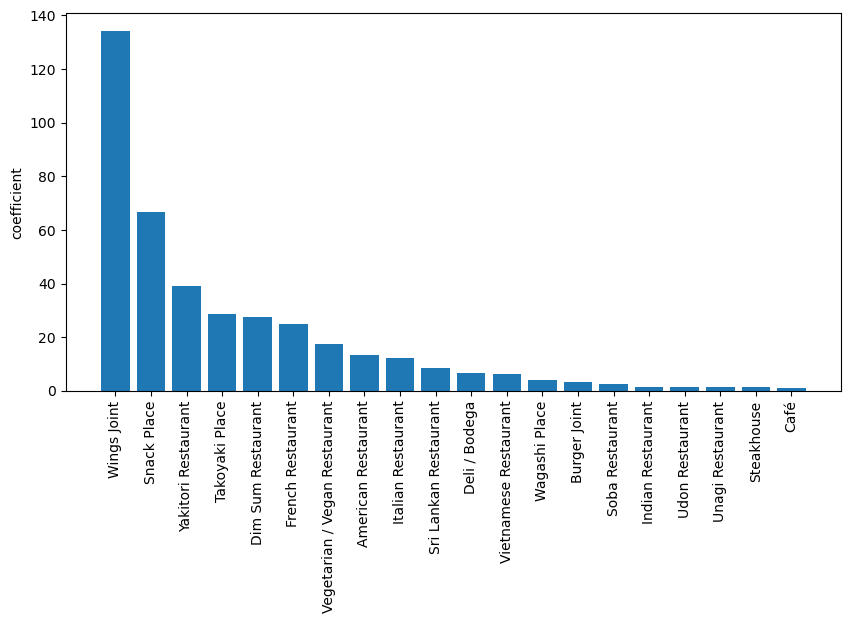

In [471]:
left = res_coef["genre"][:20]
height = res_coef["coefficient"][:20]
fig = plt.figure(figsize=(10,5),dpi=100)
plt.bar(left, height)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

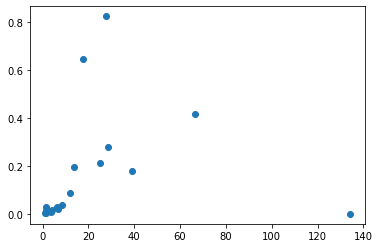

In [463]:
plt.scatter(res_coef["coefficient"][:20],res_coef["score"][:20])

Check the result No.1 to No.20 genre

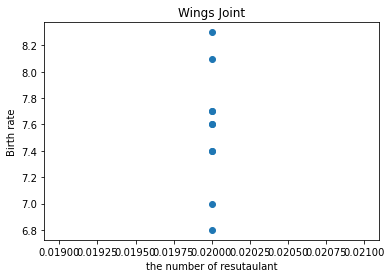

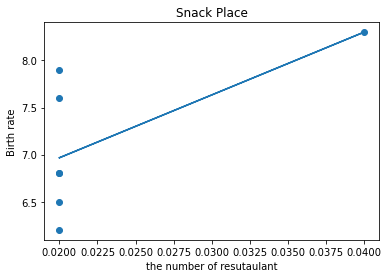

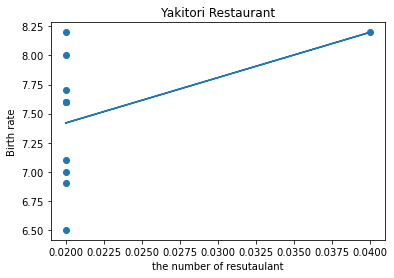

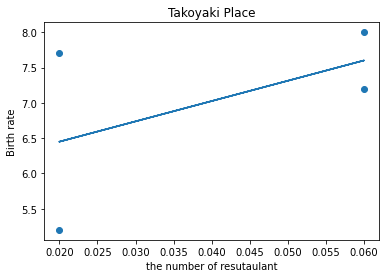

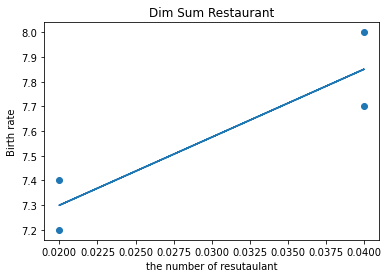

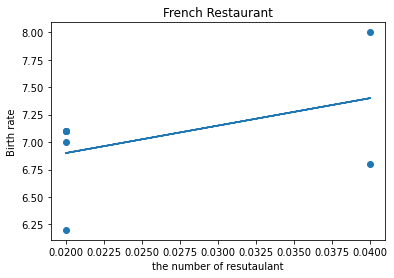

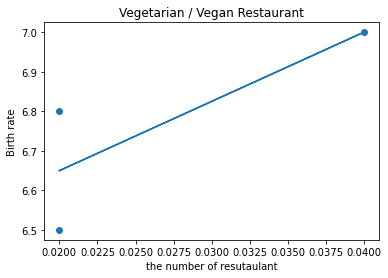

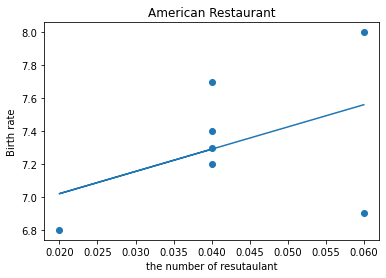

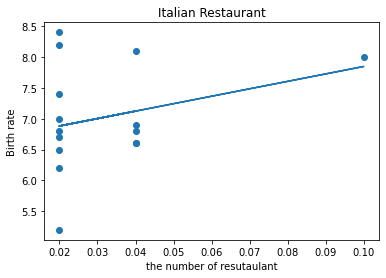

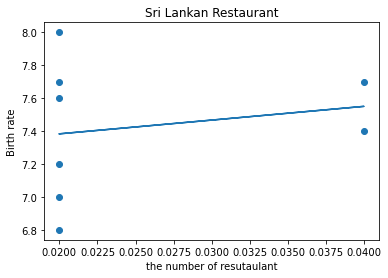

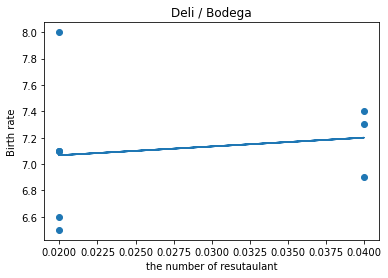

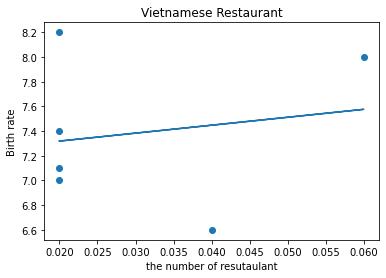

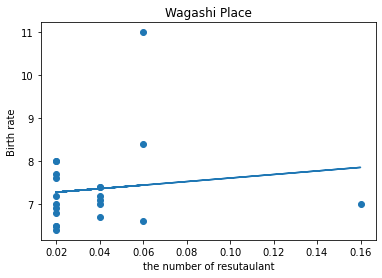

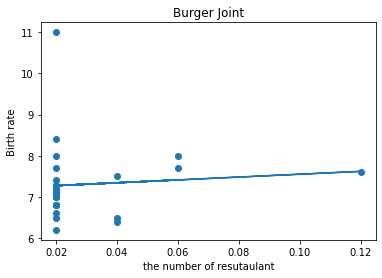

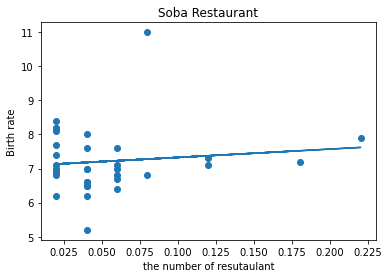

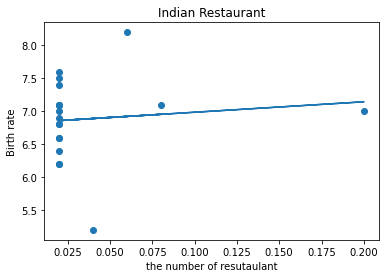

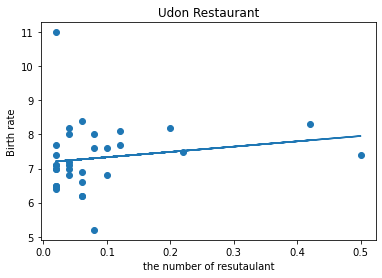

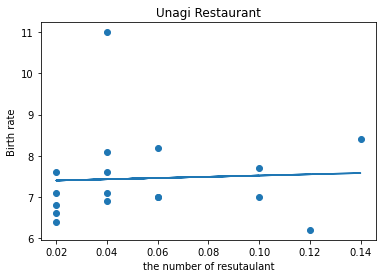

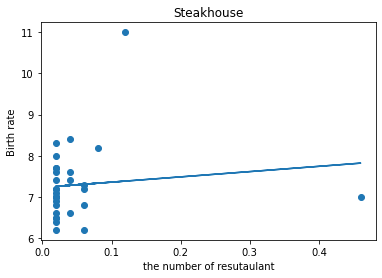

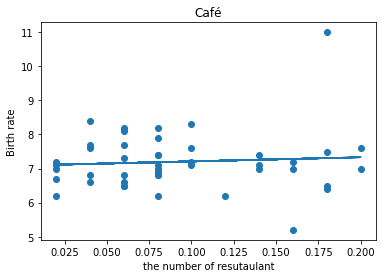

In [481]:
for i,genre in enumerate(res_coef["genre"][:20]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    plt.figure(i)
    plt.scatter(X,Y)
    plt.xlabel('the number of resutaulant')
    plt.ylabel('Birth rate')
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
    plt.plot(X2,clf.predict(X2))
    plt.title(genre)

Check the result Worst.1 to 20 genre

In [1]:
res_worse = results.sort_values(by = 'coefficient')
left = res_worse["genre"][:20]
height = res_worse["coefficient"][:20]
fig = plt.figure(figsize=(10,5),dpi=100)
plt.bar(left, height)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

NameError: name 'results' is not defined

In [2]:
for i,genre in enumerate(res_worse["genre"][:20]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    plt.figure(i)
    plt.scatter(X,Y)
    plt.xlabel('the number of resutaulant')
    plt.ylabel('Birth rate')
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
    plt.plot(X2,clf.predict(X2))
    plt.title(genre)

NameError: name 'res_worse' is not defined

## Conclusion
There is no relation ship between resutaulant genre and birth rate. 
Because there is very few data

## Get a lot of data

In [113]:
def getNearbyVenues_big(names, latitudes, longitudes):
    LIMIT =50
    radius = 20000
    venues_list = []
    tot = 5000
    num_times = 2
    locale = "en"
    for name, latitude, longitude in zip(names,latitudes, longitudes):
        for lat in range(-num_times,num_times):
            for lng in range(-num_times,num_times):
                url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}&locale={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION,
                latitude + lat*0.01,
                longitude + lng*0.01,
                'food',
                radius,
                LIMIT,
                locale)
                access = True
                while access :
                    access = False
                    try :
                        results = requests.get(url).json()["response"]["groups"][0]["items"]                
                    except Exception as e:
                        print("Error : {}".format(e))
                        access = True
                        print("wait 15 minutes")
                        time.sleep(60*15)
                    try :
                        venues_list.append([(
                        name,
                        v['venue']['categories'][0]['name'])for v in results])
                    except Exception as e:
                        print("name {} , lat {}, lng {}".format(name,lat,lng))
                        print('catch TypeError: {}'.format(e))
                print("name {}, lat {}, lng {}".format(name,lat,lng))

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Prefecture',
                            'venue category']
    
    return(nearby_venues)

In [114]:
df1 = df.iloc[:25,:]
df2 = df.iloc[25:,:]

In [115]:
venues_big1 = getNearbyVenues_big(names = df1['Prefectures'],
                        latitudes = df1['latitude'],
                        longitudes = df1['longitude'])
venues_big1.head(100)

name hokkaido, lat -2, lng -2
name hokkaido, lat -2, lng -1
name hokkaido, lat -2, lng 0
name hokkaido, lat -2, lng 1
name hokkaido, lat -1, lng -2
name hokkaido, lat -1, lng -1
name hokkaido, lat -1, lng 0
name hokkaido, lat -1, lng 1
name hokkaido, lat 0, lng -2
name hokkaido, lat 0, lng -1
name hokkaido, lat 0, lng 0
name hokkaido, lat 0, lng 1
name hokkaido, lat 1, lng -2
name hokkaido, lat 1, lng -1
name hokkaido, lat 1, lng 0
name hokkaido, lat 1, lng 1
name aomori, lat -2, lng -2
name aomori, lat -2, lng -1
name aomori, lat -2, lng 0
name aomori, lat -2, lng 1
name aomori, lat -1, lng -2
name aomori, lat -1, lng -1
name aomori, lat -1, lng 0
name aomori, lat -1, lng 1
name aomori, lat 0, lng -2
name aomori, lat 0, lng -1
name aomori, lat 0, lng 0
name aomori, lat 0, lng 1
name aomori, lat 1, lng -2
name aomori, lat 1, lng -1
name aomori, lat 1, lng 0
name aomori, lat 1, lng 1
name iwate, lat -2, lng -2
name iwate, lat -2, lng -1
name iwate, lat -2, lng 0
name iwate, lat -2, lng 

name yamanashi, lat 0, lng -1
name yamanashi, lat 0, lng 0
name yamanashi, lat 0, lng 1
name yamanashi, lat 1, lng -2
name yamanashi, lat 1, lng -1
name yamanashi, lat 1, lng 0
name yamanashi, lat 1, lng 1
name nagano, lat -2, lng -2
name nagano, lat -2, lng -1
name nagano, lat -2, lng 0
name nagano, lat -2, lng 1
name nagano, lat -1, lng -2
name nagano, lat -1, lng -1
name nagano, lat -1, lng 0
name nagano, lat -1, lng 1
name nagano, lat 0, lng -2
name nagano, lat 0, lng -1
name nagano, lat 0, lng 0
name nagano, lat 0, lng 1
name nagano, lat 1, lng -2
name nagano, lat 1, lng -1
name nagano, lat 1, lng 0
name nagano, lat 1, lng 1
name gifu, lat -2, lng -2
name gifu, lat -2, lng -1
name gifu, lat -2, lng 0
name gifu, lat -2, lng 1
name gifu, lat -1, lng -2
name gifu, lat -1, lng -1
name gifu, lat -1, lng 0
name gifu, lat -1, lng 1
name gifu, lat 0, lng -2
name gifu, lat 0, lng -1
name gifu, lat 0, lng 0
name gifu, lat 0, lng 1
name gifu, lat 1, lng -2
name gifu, lat 1, lng -1
name gifu,

,Prefecture,venue category
0,hokkaido,Chinese Restaurant
1,hokkaido,Sandwich Place
2,hokkaido,Japanese Curry Restaurant
3,hokkaido,Noodle House
4,hokkaido,BBQ Joint
...,...,...
95,hokkaido,Bakery
96,hokkaido,Café
97,hokkaido,Japanese Curry Restaurant
98,hokkaido,Café


In [116]:
venues_big2 = getNearbyVenues_big(names = df2['Prefectures'],
                        latitudes = df2['latitude'],
                        longitudes = df2['longitude'])
venues_big2.head(100)

name kyoto, lat -2, lng -2
name kyoto, lat -2, lng -1
name kyoto, lat -2, lng 0
name kyoto, lat -2, lng 1
name kyoto, lat -1, lng -2
name kyoto, lat -1, lng -1
name kyoto, lat -1, lng 0
name kyoto, lat -1, lng 1
name kyoto, lat 0, lng -2
name kyoto, lat 0, lng -1
name kyoto, lat 0, lng 0
name kyoto, lat 0, lng 1
name kyoto, lat 1, lng -2
name kyoto, lat 1, lng -1
name kyoto, lat 1, lng 0
name kyoto, lat 1, lng 1
name osaka, lat -2, lng -2
name osaka, lat -2, lng -1
name osaka, lat -2, lng 0
name osaka, lat -2, lng 1
name osaka, lat -1, lng -2
name osaka, lat -1, lng -1
name osaka, lat -1, lng 0
name osaka, lat -1, lng 1
name osaka, lat 0, lng -2
name osaka, lat 0, lng -1
name osaka, lat 0, lng 0
name osaka, lat 0, lng 1
name osaka, lat 1, lng -2
name osaka, lat 1, lng -1
name osaka, lat 1, lng 0
name osaka, lat 1, lng 1
name hyogo, lat -2, lng -2
name hyogo, lat -2, lng -1
name hyogo, lat -2, lng 0
name hyogo, lat -2, lng 1
name hyogo, lat -1, lng -2
name hyogo, lat -1, lng -1
name hyo

name oita, lat 0, lng 1
name oita, lat 1, lng -2
name oita, lat 1, lng -1
name oita, lat 1, lng 0
name oita, lat 1, lng 1
name miyazaki, lat -2, lng -2
name miyazaki, lat -2, lng -1
name miyazaki, lat -2, lng 0
name miyazaki, lat -2, lng 1
name miyazaki, lat -1, lng -2
name miyazaki, lat -1, lng -1
name miyazaki, lat -1, lng 0
name miyazaki, lat -1, lng 1
name miyazaki, lat 0, lng -2
name miyazaki, lat 0, lng -1
name miyazaki, lat 0, lng 0
name miyazaki, lat 0, lng 1
name miyazaki, lat 1, lng -2
name miyazaki, lat 1, lng -1
name miyazaki, lat 1, lng 0
name miyazaki, lat 1, lng 1
name kagoshima, lat -2, lng -2
name kagoshima, lat -2, lng -1
name kagoshima, lat -2, lng 0
name kagoshima, lat -2, lng 1
name kagoshima, lat -1, lng -2
name kagoshima, lat -1, lng -1
name kagoshima, lat -1, lng 0
name kagoshima, lat -1, lng 1
name kagoshima, lat 0, lng -2
name kagoshima, lat 0, lng -1
name kagoshima, lat 0, lng 0
name kagoshima, lat 0, lng 1
name kagoshima, lat 1, lng -2
name kagoshima, lat 1,

,Prefecture,venue category
0,kyoto,Japanese Restaurant
1,kyoto,Japanese Curry Restaurant
2,kyoto,Chinese Restaurant
3,kyoto,Japanese Curry Restaurant
4,kyoto,Café
...,...,...
95,kyoto,Café
96,kyoto,Burger Joint
97,kyoto,Wagashi Place
98,kyoto,Café


Check the connection

In [22]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&radius={}&limit={}&locale={}'.format(
                CLIENT_ID,
                CLIENT_SECRET,
                VERSION,
                43.061936, 141.3542924,
                'food',
                1000,
                50,
                'en')
results = requests.get(url).json()["response"]["groups"][0]["items"]  

In [23]:
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '55fd4b6e498eb466f2873c45',
   'name': 'Donguri (どんぐり)',
   'location': {'address': '中央区大通西1-13',
    'crossStreet': 'ル・トロワ 1F',
    'lat': 43.060369852295985,
    'lng': 141.3556256890297,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.060369852295985,
      'lng': 141.3556256890297}],
    'distance': 205,
    'postalCode': '060-0001',
    'cc': 'JP',
    'neighborhood': '中央区',
    'city': 'Sapporo',
    'state': 'Hokkaidō',
    'country': 'Japan',
    'formattedAddress': ['中央区大通西1-13 (ル・トロワ 1F)',
     'Sapporo, Hokkaidō',
     '060-0001',
     'Japan']},
   'categories': [{'id': '4bf58dd8d48988d16a941735',
     'name': 'Bakery',
     'pluralName': 'Bakeries',
     'shortName': 'Bakery',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
      'suffix': '.png'},
     'primary': Tru

In [117]:
venues_tot = pd.concat([venues_big1,venues_big2])
venues_tot.head()

,Prefecture,venue category
0,hokkaido,Chinese Restaurant
1,hokkaido,Sandwich Place
2,hokkaido,Japanese Curry Restaurant
3,hokkaido,Noodle House
4,hokkaido,BBQ Joint


In [118]:
venues_tot.groupby('Prefecture').count()

,venue category
Prefecture,
aichi,800
akita,796
aomori,800
chiba,800
ehime,800
fukui,288
fukuoka,800
fukushima,800
gifu,778


In [119]:
jp_onehot = pd.get_dummies(venues_tot[['venue category']], prefix="", prefix_sep="")
jp_onehot['Prefecture'] = venues_tot['Prefecture']

fixed_columns = [jp_onehot.columns[-1]] + list(jp_onehot.columns[:-1])
jp_onehot = jp_onehot[fixed_columns]

jp_onehot.head()

,Prefecture,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bavarian Restaurant,Bistro,Brazilian Restaurant,...,Tonkatsu Restaurant,Truck Stop,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wings Joint,Yakitori Restaurant,Yoshoku Restaurant
0,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,hokkaido,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,hokkaido,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
pd.options.display.precision = 4
jp_grouped = jp_onehot.groupby('Prefecture').mean().reset_index()

In [121]:
jp_grouped

,Prefecture,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bavarian Restaurant,Bistro,Brazilian Restaurant,...,Tonkatsu Restaurant,Truck Stop,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wings Joint,Yakitori Restaurant,Yoshoku Restaurant
0,aichi,0.0000,0.0000,0.0000,0.0437,0.0000,0.0512,0.00,0.00,0.0200,...,0.0475,0.00,0.0838,0.1275,0.0000,0.0000,0.0025,0.0063,0.0037,0.0000
1,akita,0.0000,0.0000,0.0000,0.0188,0.0000,0.0000,0.00,0.00,0.0000,...,0.0000,0.00,0.0666,0.0000,0.0000,0.0000,0.0013,0.0000,0.0000,0.0000
2,aomori,0.0000,0.0000,0.0000,0.0400,0.0000,0.0000,0.00,0.00,0.0000,...,0.0400,0.00,0.0413,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,chiba,0.0000,0.0000,0.0000,0.0000,0.0000,0.0387,0.00,0.00,0.0000,...,0.0000,0.00,0.0037,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,ehime,0.0000,0.0000,0.0000,0.0200,0.0000,0.0200,0.00,0.00,0.0000,...,0.0200,0.00,0.1400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200,0.0200
5,fukui,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.0000,...,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1076,0.0000
6,fukuoka,0.0000,0.0000,0.0037,0.0612,0.0000,0.0550,0.00,0.00,0.0000,...,0.0400,0.00,0.1650,0.0150,0.0000,0.0000,0.0425,0.0000,0.0000,0.0000
7,fukushima,0.0000,0.0000,0.0000,0.0400,0.0000,0.0200,0.00,0.00,0.0000,...,0.0000,0.00,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,gifu,0.0000,0.0206,0.0000,0.0643,0.0000,0.0000,0.00,0.00,0.0000,...,0.0000,0.00,0.0000,0.0206,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,gunma,0.0000,0.0000,0.0000,0.0100,0.0000,0.0450,0.00,0.00,0.0000,...,0.0200,0.00,0.0625,0.0000,0.0000,0.0000,0.0200,0.0200,0.0000,0.0000


In [122]:
df_jp = jp_grouped.assign(Birth_Rate=df['Birth rate']) 
df_jp

,Prefecture,American Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bavarian Restaurant,Bistro,Brazilian Restaurant,...,Truck Stop,Udon Restaurant,Unagi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wings Joint,Yakitori Restaurant,Yoshoku Restaurant,Birth_Rate
0,aichi,0.0000,0.0000,0.0000,0.0437,0.0000,0.0512,0.00,0.00,0.0200,...,0.00,0.0838,0.1275,0.0000,0.0000,0.0025,0.0063,0.0037,0.0000,6.2
1,akita,0.0000,0.0000,0.0000,0.0188,0.0000,0.0000,0.00,0.00,0.0000,...,0.00,0.0666,0.0000,0.0000,0.0000,0.0013,0.0000,0.0000,0.0000,6.2
2,aomori,0.0000,0.0000,0.0000,0.0400,0.0000,0.0000,0.00,0.00,0.0000,...,0.00,0.0413,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.2
3,chiba,0.0000,0.0000,0.0000,0.0000,0.0000,0.0387,0.00,0.00,0.0000,...,0.00,0.0037,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.1
4,ehime,0.0000,0.0000,0.0000,0.0200,0.0000,0.0200,0.00,0.00,0.0000,...,0.00,0.1400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200,0.0200,5.2
5,fukui,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00,0.0000,...,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1076,0.0000,6.4
6,fukuoka,0.0000,0.0000,0.0037,0.0612,0.0000,0.0550,0.00,0.00,0.0000,...,0.00,0.1650,0.0150,0.0000,0.0000,0.0425,0.0000,0.0000,0.0000,6.8
7,fukushima,0.0000,0.0000,0.0000,0.0400,0.0000,0.0200,0.00,0.00,0.0000,...,0.00,0.0200,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.8
8,gifu,0.0000,0.0206,0.0000,0.0643,0.0000,0.0000,0.00,0.00,0.0000,...,0.00,0.0000,0.0206,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0
9,gunma,0.0000,0.0000,0.0000,0.0100,0.0000,0.0450,0.00,0.00,0.0000,...,0.00,0.0625,0.0000,0.0000,0.0000,0.0200,0.0200,0.0000,0.0000,6.8


In [123]:
clf = linear_model.LinearRegression()
col = ['genre','coefficient','score']
results = pd.DataFrame(columns=col)
for i,genre in enumerate(fixed_columns[1:]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
#    plt.plot(X2,clf.predict(X2))
#    plt.title([genre,clf.coef_,clf.score(X2,Y)])
    result = pd.Series([genre,clf.coef_[0],clf.score(X2,Y)],index = results.columns)
    results = results.append(result,ignore_index = True)

C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:589: UndefinedMetricWarning: R^2 score is not well-defined with less tha

In [124]:
results

,genre,coefficient,score
0,American Restaurant,-24.5684,0.2824
1,Asian Restaurant,-10.2284,0.2331
2,Australian Restaurant,0.0000,NaN
3,BBQ Joint,-2.0286,0.0070
4,Bagel Shop,0.0000,NaN
...,...,...,...
88,Vietnamese Restaurant,27.0700,0.4546
89,Wagashi Place,1.7790,0.0015
90,Wings Joint,63.5979,0.4373
91,Yakitori Restaurant,-4.9988,0.0201


In [125]:
res_coef = results.sort_values(by = 'coefficient', ascending=False)
res_coef.head()

,genre,coefficient,score
87,Vegetarian / Vegan Restaurant,660.0000,0.0386
40,Hot Dog Joint,194.2857,0.3192
32,French Restaurant,106.0508,0.1436
90,Wings Joint,63.5979,0.4373
74,Sukiyaki Restaurant,43.3333,0.2002


check the results
analysis the good coefficient score

Text(0, 0.5, 'coefficient')

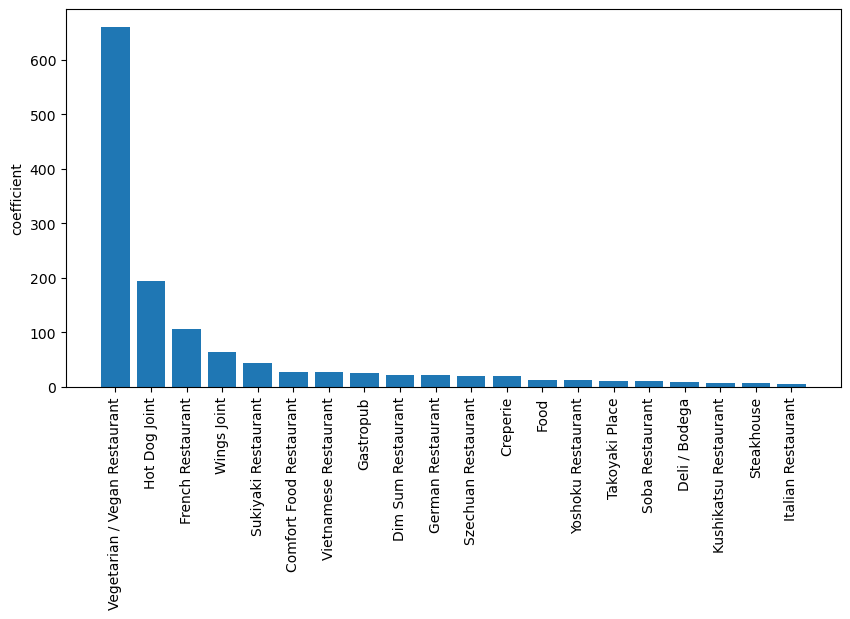

In [126]:
left = res_coef["genre"][:20]
height = res_coef["coefficient"][:20]
fig = plt.figure(figsize=(10,5),dpi=100)
plt.bar(left, height)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

Check the result No.1 to No.20 genre

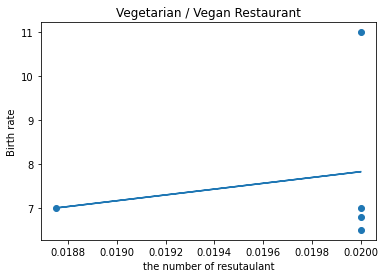

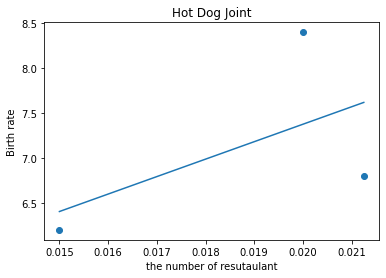

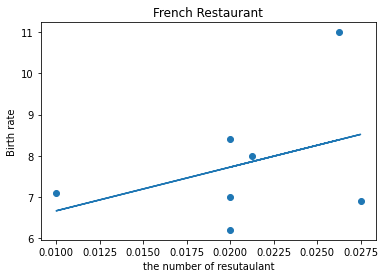

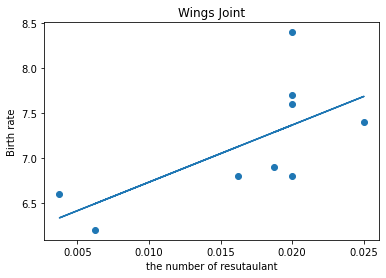

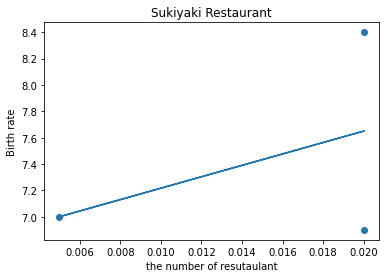

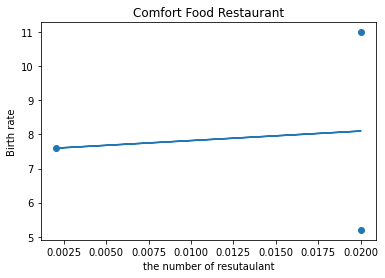

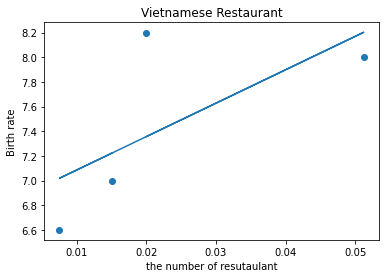

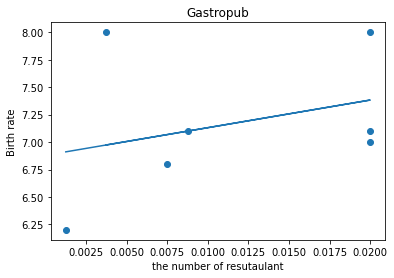

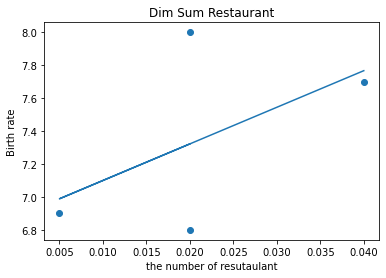

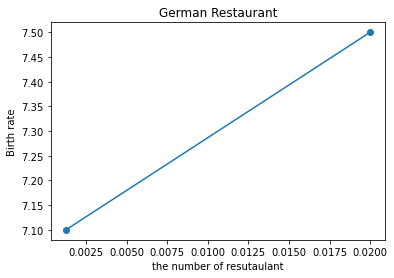

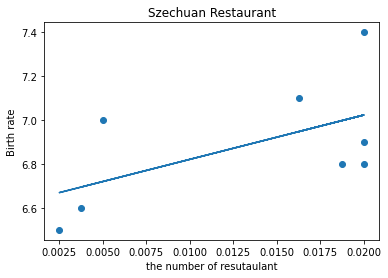

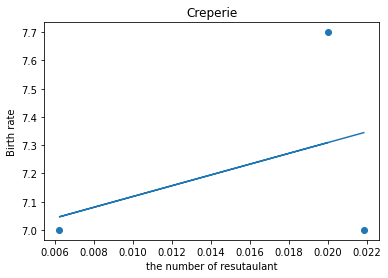

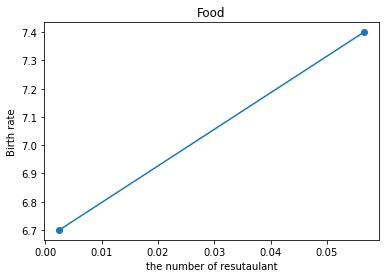

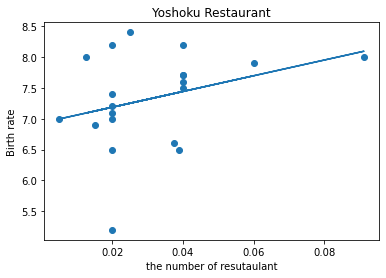

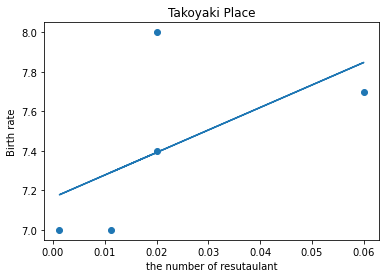

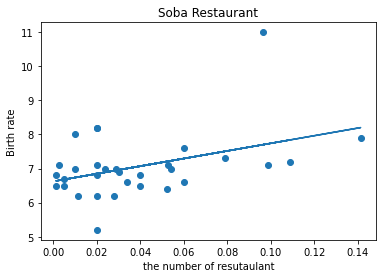

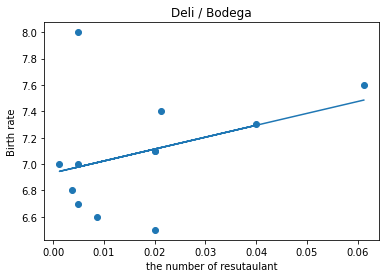

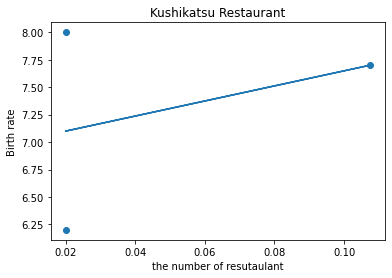

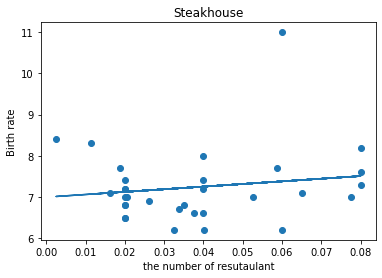

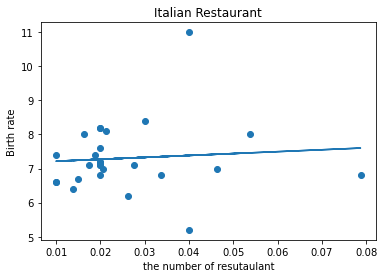

In [127]:
for i,genre in enumerate(res_coef["genre"][:20]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    plt.figure(i)
    plt.scatter(X,Y)
    plt.xlabel('the number of resutaulant')
    plt.ylabel('Birth rate')
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
    plt.plot(X2,clf.predict(X2))
    plt.title(genre)

Correlation isn't good. next analysis score

In [128]:
res_score = results.sort_values(by = 'score', ascending=False)
res_score.head()

,genre,coefficient,score
29,Food,12.9541,1.0000
35,German Restaurant,21.3333,1.0000
67,Shabu-Shabu Restaurant,-53.3333,1.0000
72,Sri Lankan Restaurant,-130.0000,0.9826
9,Breakfast Spot,-6.9176,0.8359


Text(0, 0.5, 'score')

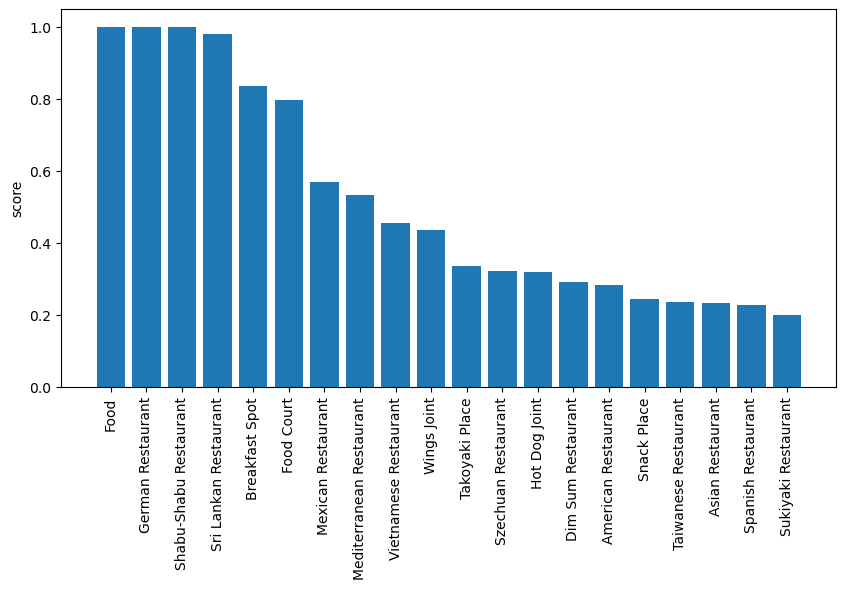

In [129]:
left = res_score["genre"][:20]
height = res_score["score"][:20]
fig = plt.figure(figsize=(10,5),dpi=100)
plt.bar(left, height)
plt.xticks(rotation=90)
plt.ylabel('score')

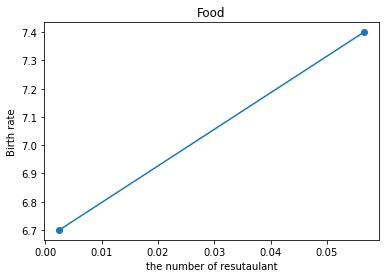

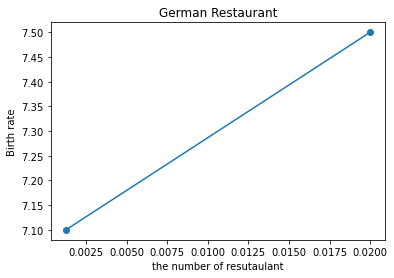

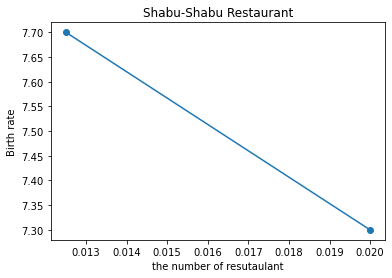

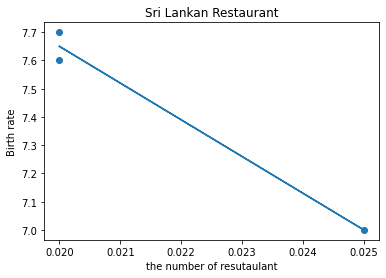

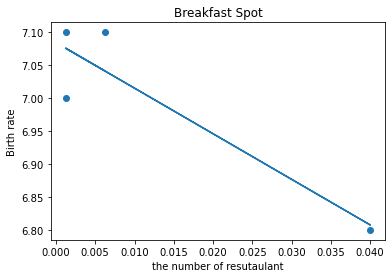

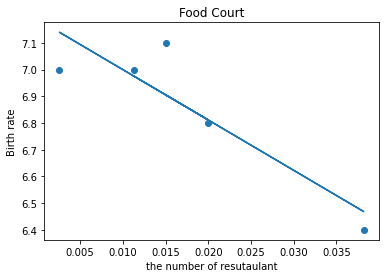

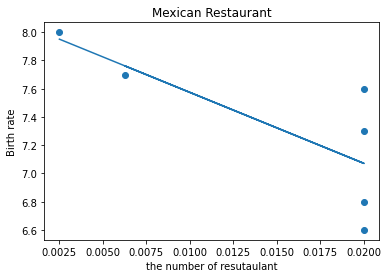

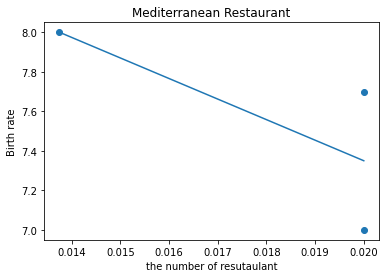

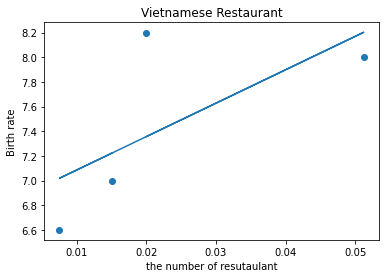

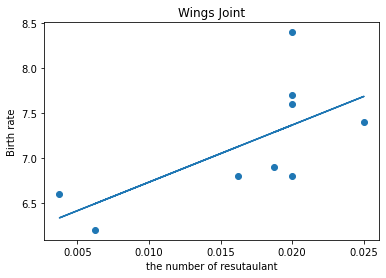

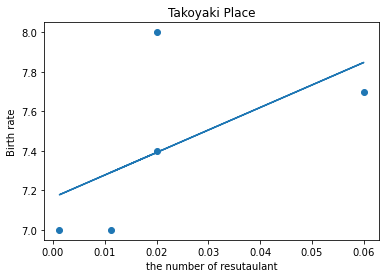

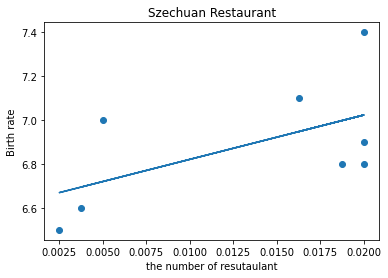

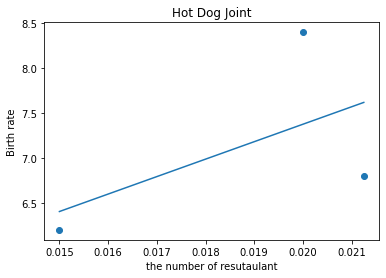

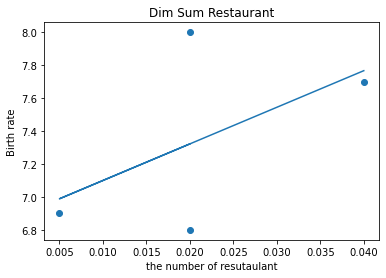

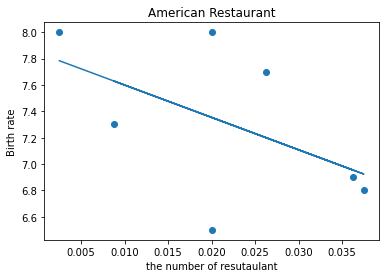

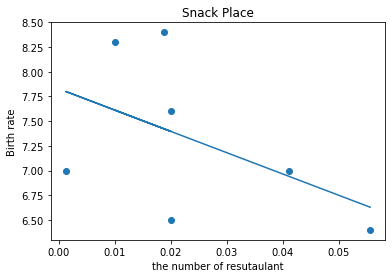

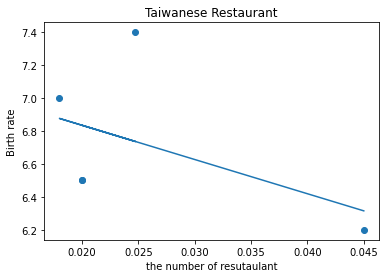

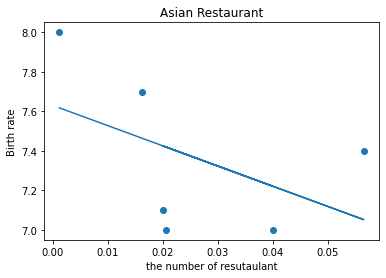

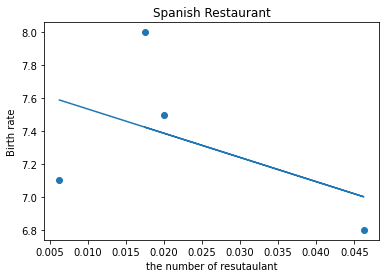

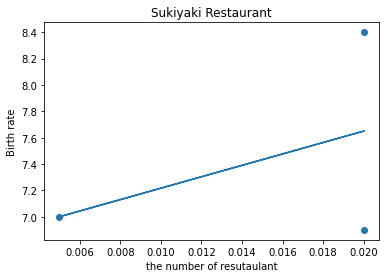

In [130]:
for i,genre in enumerate(res_score["genre"][:20]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    plt.figure(i)
    plt.scatter(X,Y)
    plt.xlabel('the number of resutaulant')
    plt.ylabel('Birth rate')
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
    plt.plot(X2,clf.predict(X2))
    plt.title(genre)

Most of them looks like noise. But some of cases looks a correlation (e.x. Soba Restaurant)  
Next, focus only more 10 data genre.

In [131]:
clf = linear_model.LinearRegression()
col = ['genre','coefficient','score','count']
results_f = pd.DataFrame(columns=col)
for i,genre in enumerate(fixed_columns[1:]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    if(np.sum(X>0)<11):
        continue
    clf.fit(X2,Y)
#    plt.plot(X2,clf.predict(X2))
#    plt.title([genre,clf.coef_,clf.score(X2,Y)])
    result = pd.Series([genre,clf.coef_[0],clf.score(X2,Y),np.sum(X>0)],index = results_f.columns)
    results_f = results_f.append(result,ignore_index = True)

In [132]:
results_f

,genre,coefficient,score,count
0,BBQ Joint,-2.0286,7.0443e-03,40
1,Bakery,5.0766,3.8348e-02,38
2,Burger Joint,1.1504,5.6297e-03,22
3,Café,0.6653,1.2241e-03,47
4,Chinese Restaurant,2.5918,7.6071e-03,38
5,Deli / Bodega,9.0231,1.3572e-01,12
6,Diner,-1.3645,1.6595e-03,23
7,Donburi Restaurant,1.9354,1.6257e-03,15
8,Donut Shop,-10.5284,1.0935e-01,12
9,Dumpling Restaurant,-1.0335,1.1945e-02,17


In [133]:
res_score_f = results_f.sort_values(by = 'score', ascending=False)
res_score_f.head()

,genre,coefficient,score,count
20,Soba Restaurant,11.1619,0.1645,31
5,Deli / Bodega,9.0231,0.1357,12
8,Donut Shop,-10.5284,0.1093,12
30,Yoshoku Restaurant,12.7026,0.1029,20
23,Tempura Restaurant,-9.5437,0.0941,11


C:\Users\kazuya\.conda\envs\ds\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
C:\Users\kazuya\.conda\envs\ds\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly c

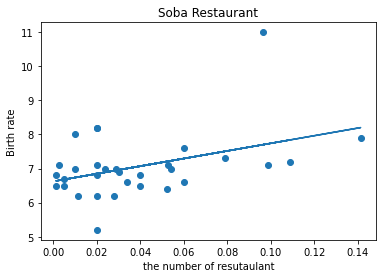

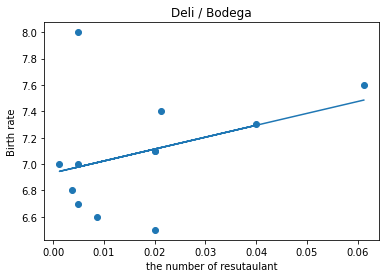

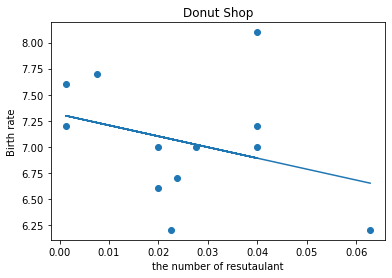

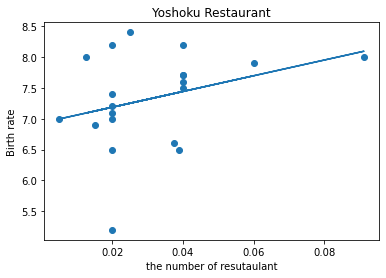

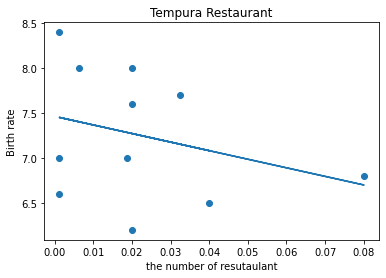

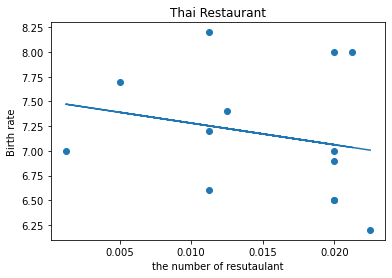

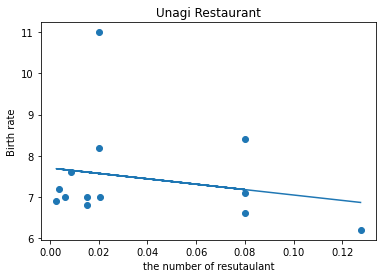

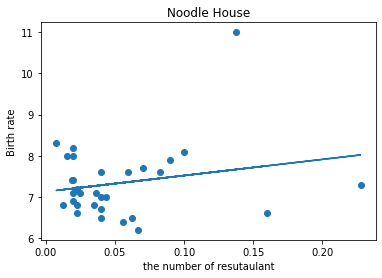

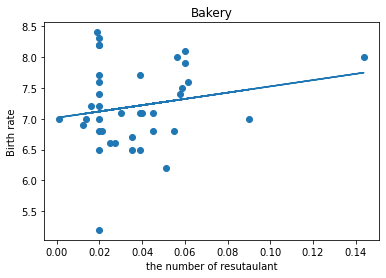

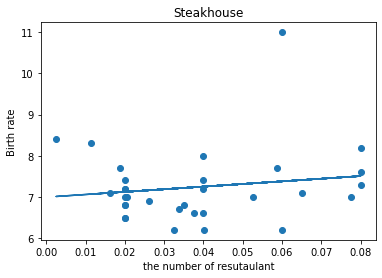

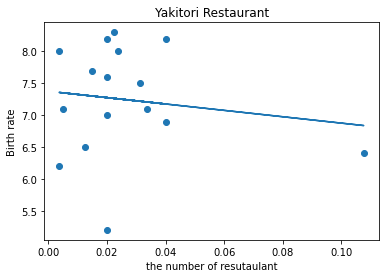

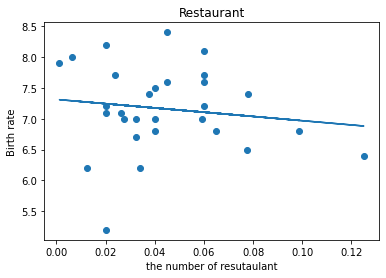

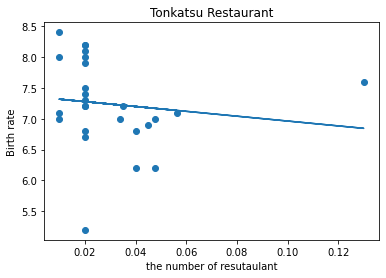

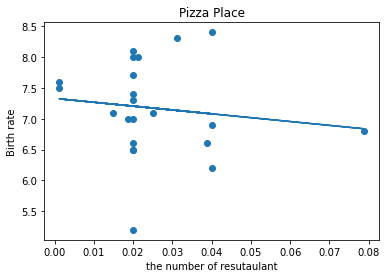

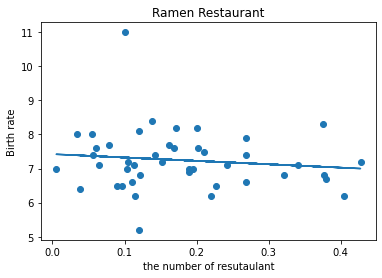

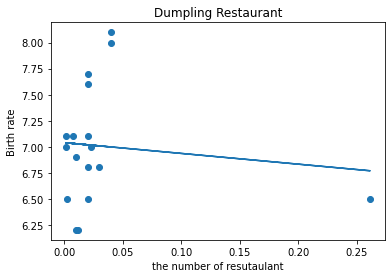

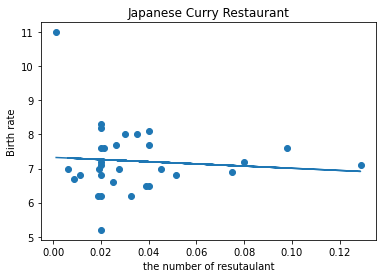

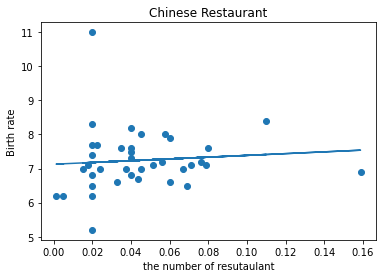

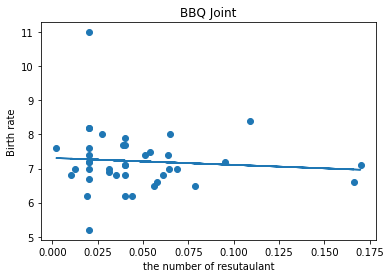

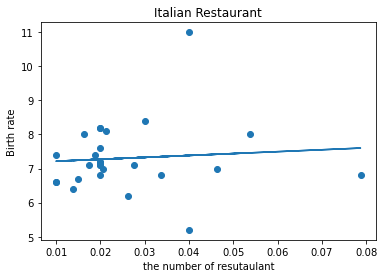

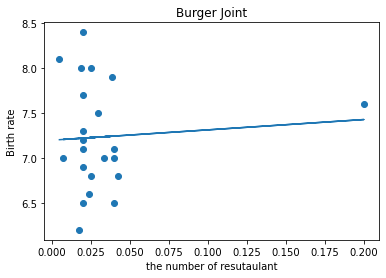

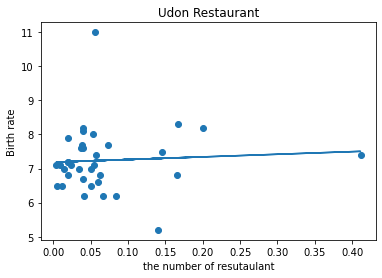

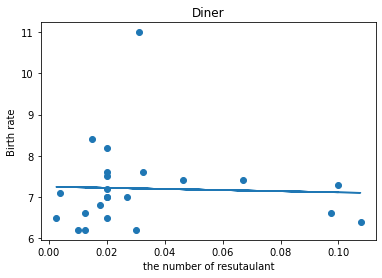

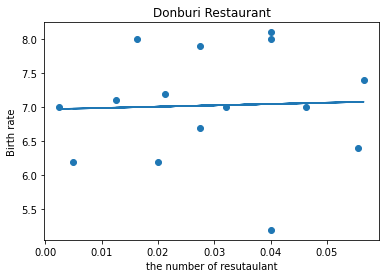

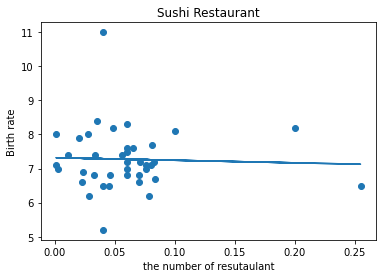

In [134]:
for i,genre in enumerate(res_score_f["genre"][:25]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    plt.figure(i)
    plt.scatter(X,Y)
    plt.xlabel('the number of resutaulant')
    plt.ylabel('Birth rate')
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
    plt.plot(X2,clf.predict(X2))
    plt.title(genre)

Still, there are genre which has no correlation.  
So, more focus by using score

In [135]:
results_ff = results_f[results_f['score']>0.02]
res_coef_f = results_ff.sort_values(by = 'coefficient', ascending=False)
res_coef_f.head()

,genre,coefficient,score,count
30,Yoshoku Restaurant,12.7026,0.1029,20
20,Soba Restaurant,11.1619,0.1645,31
5,Deli / Bodega,9.0231,0.1357,12
21,Steakhouse,6.3906,0.0246,32
1,Bakery,5.0766,0.0383,38


Text(0, 0.5, 'coefficient')

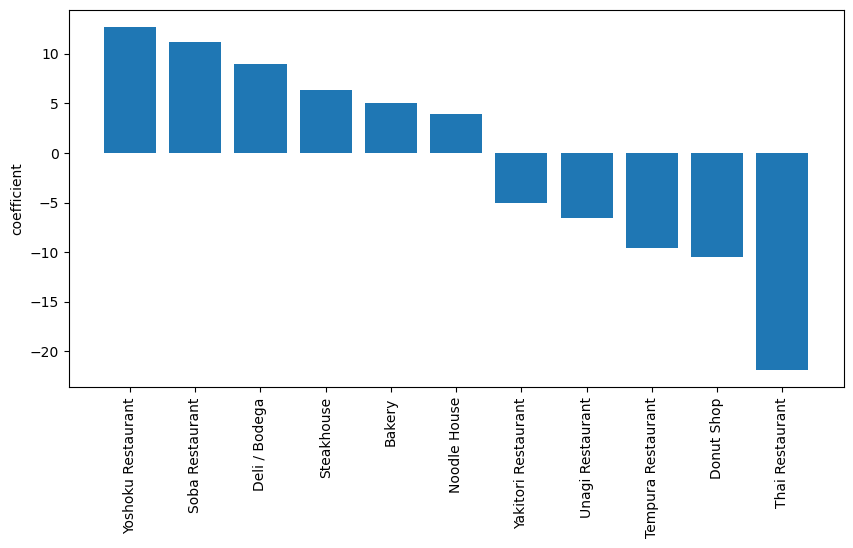

In [136]:
left = res_coef_f["genre"]
height = res_coef_f["coefficient"]
fig = plt.figure(figsize=(10,5),dpi=100)
plt.bar(left, height)
plt.xticks(rotation=90)
plt.ylabel('coefficient')

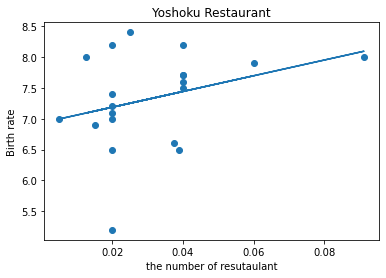

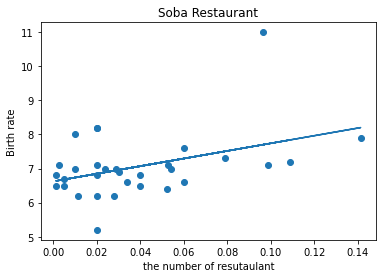

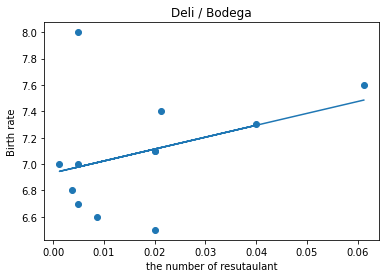

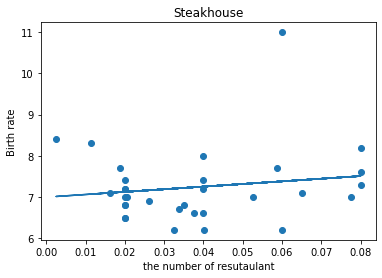

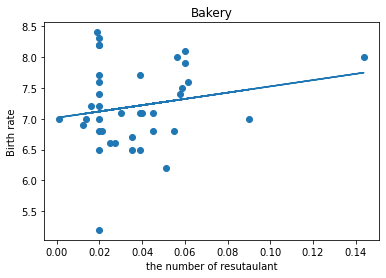

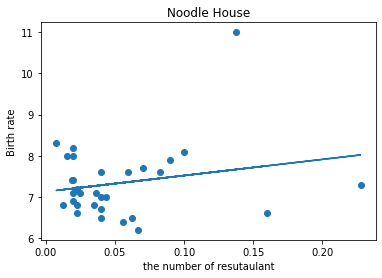

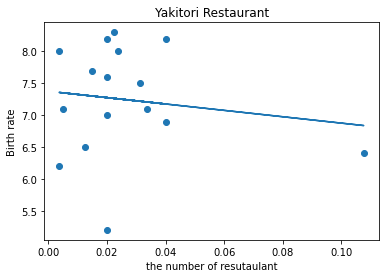

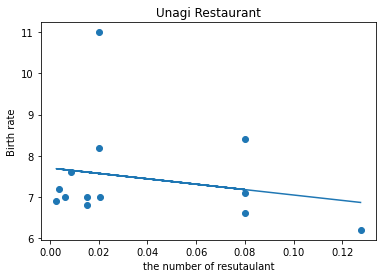

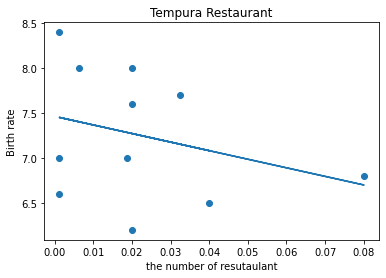

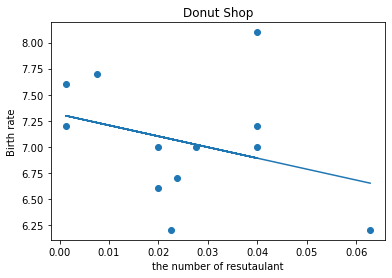

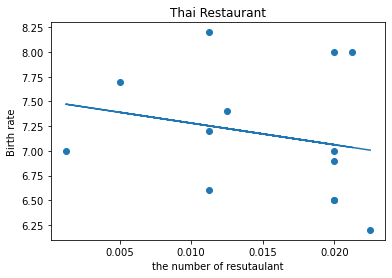

In [137]:
for i,genre in enumerate(res_coef_f["genre"][:20]):
    X = df_jp[genre][df_jp[genre]!=0].values
    Y = df_jp['Birth_Rate'][df_jp[genre]!=0].values
    plt.figure(i)
    plt.scatter(X,Y)
    plt.xlabel('the number of resutaulant')
    plt.ylabel('Birth rate')
    X2 = [[x] for x in X]
 #   plt.figure(genre)
 #   plt.scatter(X2,Y)
    clf.fit(X2,Y)
    plt.plot(X2,clf.predict(X2))
    plt.title(genre)

For report visualise data gathering point

In [101]:
df

,Prefectural capitals,Prefectures,Birth rate,latitude,longitude
0,sapporo,hokkaido,6.2,43.0619,141.3543
1,aomori,aomori,6.2,40.8869,140.5901
2,morioka,iwate,6.2,39.7021,141.1545
3,sendai,miyagi,7.1,38.2678,140.8691
4,akita,akita,5.2,39.6899,140.3426
5,yamagata,yamagata,6.4,38.2553,140.3400
6,fukushima,fukushima,6.8,37.7545,140.4592
7,mito,ibaraki,6.8,36.3658,140.4714
8,utsunomiya,tochigi,7.0,36.5550,139.8829
9,maebashi,gunma,6.8,36.3893,139.0633


In [109]:
location = [df.at[12,'latitude'],df.at[12,'longitude']]
map_jp = folium.Map(location,zoom_start = 5)
num_times = 2
# add markers to map
for lat, lng, pref, Brate in zip(df['latitude'],df['longitude'],df['Prefectures'], df['Birth rate']):
    for ad_lat in range(-num_times,num_times):
        for ad_lng in range(-num_times,num_times):
            label = '{} {} {}'.format(pref, lat, lng)
            label = folium.Popup(label,parse_html=True)
            latitude = lat + ad_lat*0.01,
            longitude = lng + ad_lng*0.01,
            print(latitude[0],longitude[0])
            folium.CircleMarker(
            [latitude[0],longitude[0]],
            radius = 3,
            color = 'blue',
            popup = label,
            fill = True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html = False
            ).add_to(map_jp)
map_jp

43.041936 141.33429239999998
43.041936 141.3442924
43.041936 141.3542924
43.041936 141.36429239999998
43.051936000000005 141.33429239999998
43.051936000000005 141.3442924
43.051936000000005 141.3542924
43.051936000000005 141.36429239999998
43.061936 141.33429239999998
43.061936 141.3442924
43.061936 141.3542924
43.061936 141.36429239999998
43.071936 141.33429239999998
43.071936 141.3442924
43.071936 141.3542924
43.071936 141.36429239999998
40.866943 140.570121
40.866943 140.58012100000002
40.866943 140.590121
40.866943 140.600121
40.876943000000004 140.570121
40.876943000000004 140.58012100000002
40.876943000000004 140.590121
40.876943000000004 140.600121
40.886943 140.570121
40.886943 140.58012100000002
40.886943 140.590121
40.886943 140.600121
40.896943 140.570121
40.896943 140.58012100000002
40.896943 140.590121
40.896943 140.600121
39.682133099999994 141.13453969999998
39.682133099999994 141.1445397
39.682133099999994 141.1545397
39.682133099999994 141.16453969999998
39.6921331 141